In [1]:
import pandas as pd
import numpy as np

from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_meta = pd.read_csv("D:/Programming/HC Project/Dataset/Dataset_Compiled - Metabolic.csv")

In [3]:
data_meta.head()

,Glucose,Blood urea nitrogen (BUN),Creatinine,BUN/Creatinine ratio,Calcium,Protein,Albumin,Alanine Phosphatase (ALP),Alanine amino transferase (ALT),Predictions
0,96.0,17.92,0.98,27:1,5.9,7.30,3.84,7.44,13.0,1
1,91.0,17.95,0.93,18:1,5.5,6.68,5.23,9.48,22.1,1
2,73.0,15.00,1.20,12.5:1,7.3,6.90,4.90,53.00,19.0,0
3,97.9,19.80,1.20,16.5:1,5.2,6.70,4.70,69.00,16.0,0
4,72.0,20.56,0.93,19:1,7.4,8.02,4.99,18.05,23.0,1


In [4]:
data_meta.tail()

,Glucose,Blood urea nitrogen (BUN),Creatinine,BUN/Creatinine ratio,Calcium,Protein,Albumin,Alanine Phosphatase (ALP),Alanine amino transferase (ALT),Predictions
1010,87.0,16.00,1.40,11.4285714285714:1,5.8,6.90,4.00,135.00,32.0,0
1011,99.0,15.00,1.40,10.7142857142857:1,7.9,7.20,5.00,78.00,16.0,0
1012,95.0,21.36,0.81,22:1,5.7,6.99,5.66,11.01,16.6,1
1013,87.0,8.00,1.40,5.71428571428571:1,7.1,6.50,4.50,113.00,36.0,0
1014,80.0,20.00,0.80,25:1,5.8,6.90,5.00,75.00,19.0,0


In [5]:
data_meta.columns

Index(['Glucose', 'Blood urea nitrogen (BUN)', 'Creatinine',
       'BUN/Creatinine ratio', 'Calcium', 'Protein', 'Albumin',
       'Alanine Phosphatase (ALP)', 'Alanine amino transferase (ALT)',
       'Predictions'],
      dtype='object')

In [6]:
data_meta.shape

(1015, 10)

In [7]:
data_meta.describe()

,Glucose,Blood urea nitrogen (BUN),Creatinine,Calcium,Protein,Albumin,Alanine Phosphatase (ALP),Alanine amino transferase (ALT),Predictions
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,86.063645,16.329034,1.048197,6.539409,7.089419,4.451714,54.880798,20.342562,0.507389
std,9.318475,4.050601,0.694005,1.039887,0.577748,0.554336,47.189538,7.358737,0.500192
min,68.000000,7.000000,0.670000,5.100000,6.120000,3.270000,4.360000,8.000000,0.000000
25%,78.000000,14.000000,0.820000,5.700000,6.600000,4.095000,13.350000,14.450000,0.000000
50%,86.000000,17.590000,0.960000,5.900000,7.000000,4.450000,23.130000,20.000000,1.000000
75%,94.000000,19.420000,1.200000,7.400000,7.545000,4.855000,95.000000,25.400000,1.000000
max,105.000000,21.420000,21.420000,11.100000,8.230000,5.680000,147.000000,37.000000,1.000000


In [8]:
data_meta.isnull().sum()

Glucose                            0
Blood urea nitrogen (BUN)          0
Creatinine                         0
BUN/Creatinine ratio               0
Calcium                            0
Protein                            0
Albumin                            0
Alanine Phosphatase (ALP)          0
Alanine amino transferase (ALT)    0
Predictions                        0
dtype: int64

In [9]:
data_meta['Predictions'].unique()

array([1, 0], dtype=int64)

In [10]:
data_meta.dtypes

Glucose                            float64
Blood urea nitrogen (BUN)          float64
Creatinine                         float64
BUN/Creatinine ratio                object
Calcium                            float64
Protein                            float64
Albumin                            float64
Alanine Phosphatase (ALP)          float64
Alanine amino transferase (ALT)    float64
Predictions                          int64
dtype: object

In [11]:
data_meta['Predictions'].value_counts()

1    515
0    500
Name: Predictions, dtype: int64

<AxesSubplot:>

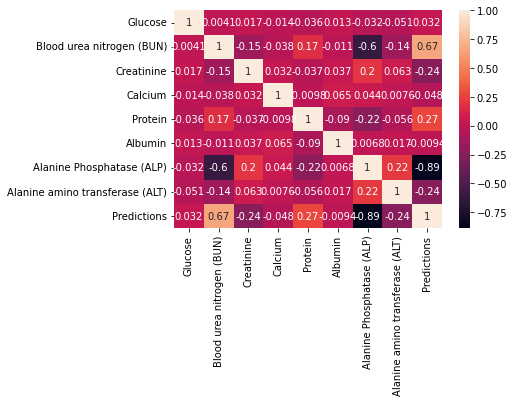

In [12]:
sns.heatmap(data_meta.corr(), annot=True)

## Seperating feature and target label

In [13]:
features = data_meta[['Glucose', 'Blood urea nitrogen (BUN)', 'Creatinine', 'Protein', 'Albumin',
       'Alanine Phosphatase (ALP)', 'Alanine amino transferase (ALT)',]]
target = data_meta['Predictions']
predictions = data_meta['Predictions']

In [14]:
acc = []
model = []

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
#Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv=5)

In [19]:
score

array([1., 1., 1., 1., 1.])

### Saving Model DecisionTree

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9950738916256158
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        98

    accuracy                           1.00       203
   macro avg       1.00      0.99      1.00       203
weighted avg       1.00      1.00      1.00       203



In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.        , 1.        , 0.99507389, 1.        , 1.        ])

### Saving Model Gaussian Naive Bayes

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9950738916256158
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        98

    accuracy                           1.00       203
   macro avg       1.00      0.99      1.00       203
weighted avg       1.00      1.00      1.00       203



In [23]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)

In [24]:
score

array([1., 1., 1., 1., 1.])

### Saving Model SVM 

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)

In [27]:
score

array([1., 1., 1., 1., 1.])

### Saving Model LR 

In [ ]:
#run this cell when model is good
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)

In [30]:
score

array([1., 1., 1., 1., 1.])

### Saving Model Random Forest 

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [31]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[23:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [32]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)

[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [33]:
score

array([1., 1., 1., 1., 1.])

### Saving Model XGBoost 

In [ ]:
#run this cell when all the models are working
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

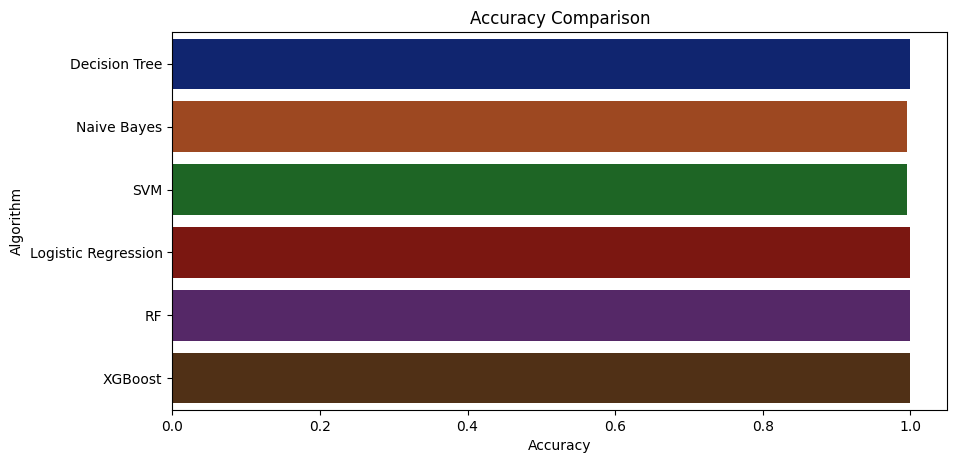

In [34]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 0.9950738916256158
SVM --> 0.9950738916256158
Logistic Regression --> 1.0
RF --> 1.0
XGBoost --> 1.0


# Making Prediction

In [36]:
data = np.array([[72, 15.9, 1.3, 6.92, 5.02, 55, 18]])
prediction = XB.predict(data)
print(prediction)

[0]
